# Метод главных компонент

### Алгоритм PCA

Дана матрица данных $D$ и коэффициент $\alpha$:
1. вычисляем среднее значение $\mu = \frac{1}{n} \sum \limits_{i=1}^{n} x_i$;
2. центруем матрицу данных $Z = D - 1 \cdot \mu^T$;
3. вычисляем матрицу ковариаций $K = \frac{1}{n} (Z^T Z)$;
4. вычисляем собственные значения $(\lambda_1, \lambda_2, \ldots, \lambda_d)$;
5. вычисляем собственные векторы $U = (u_1 u_2 \ldots u_d)$;
6. вычисляем долю общей дисперсии $f(r) = \frac{\sum_{i=1}^{r} \lambda_i} {\sum_{i=1}^{n} \lambda_i}$;
7. выбираем наименьший $r$ так, чтобы $f(r) \geq \alpha$;
8. выбираем $r$ первых векторов $U = (u_1 u_2 \ldots u_r)$;
9. уменьшаем признаковое пространство: $A = \{ a_i \: | \: a_i = U_r^T x_i, \: для \: i = 1, \ldots, n \} $

Реализуйте алгоритм для первых двух главных компонент. Найдите $\lambda_1$, $\lambda_2$ и $u_1$, $u_2$. Спроецируйте данные на плоскость образуемую этими векторами, визуализируйте полученные результаты c метками классов. Сравните реузльтаты с методом PCA из библиотеки sklearn.decomposition.

В качестве данных возьмите изображения с рукописными цифрами.

In [45]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

data = load_iris()
x, y = data['data'], data['target']

In [46]:
def _PCA(x, r):
    Z = (x[:,0] - x[:,0].mean(), x[:,1] - x[:,1].mean(), x[:,2] - x[:,2].mean(), x[:,3] - x[:,3].mean())    
    K = np.cov(Z) 
    values, U = np.linalg.eig(K)   
    fr = sum(values[:r])-sum(U)    
    U = U[:,:r]    
    return np.dot(U.transpose(), Z), values, U

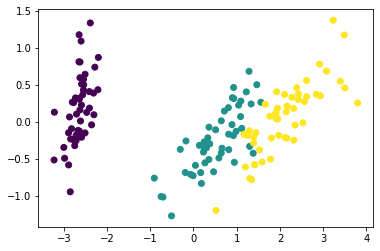

In [47]:
res2,vals2, vectors2 = _PCA(x, 2)
plt.scatter(res2[0],res2[1]*-1,c=y)

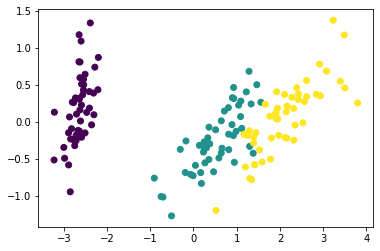

In [49]:
u = np.mean(x, axis=0)
Z = x - u
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(Z)
X_pca = pca.transform(Z)

plt.scatter(X_pca[:,0], X_pca[:,1], c = y)
plt.show()

На основе полученных собственных значений ковариационной матриы $K$ постройте график зависимости покрываемой дисперсии трансформированных данных от количества главных компонент.

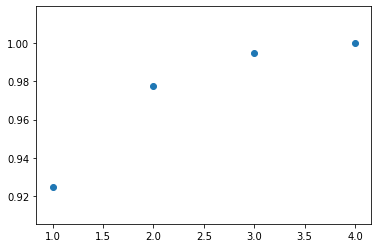

In [50]:
cov = []
ssum = 0
for vel in vals2:
    ssum = ssum+vel
    cov.append(ssum)
plt.scatter([i for i in range(1, len(vals2) + 1)], [i / ssum for i in cov])

# Интерпретация компонент
## Корреляция с исходными признаками
Главные компоненты являются линейными кобинациями исходных признаков. В этой связи необходимо оценить связь каждой компоненты с исходными признаками.

Рассчет взаимосвязи будем проводить с помощью корреляции Пирсона:

\begin{equation}
r_{jk} = \frac{\sum_{i=1}^n (x_{ij} - \bar{x}_j) (x_{ik}' - \bar{x}_k')}{\sqrt{\sum_{i=1}^n (x_{ij} - \bar{x}_j)^2 \sum_{i=1}^n (x_{ik}' - \bar{x}_k')^2}}
\end{equation}

где
$\bar{x}_j$ - среднее значение $j$-го признака,
$\bar{x}_k'$ - среднее значение проекции на $k$-ю главную компоненту,
$n$ - количество объектов.

Отметим, что корреляция Пирсона изменяется от $-1$ до $+1$. Она равна $0$ в случае, когда величины независимы, и $\pm 1$, если они линейно зависимы.

Определите по коэффициентам корреляции, какие признаки в какую компоненту вошли.

In [51]:
res2[1] = res2[1]*-1
rtrns = res2.transpose()
k = 1
for i in range(x.shape[1]):
    m = x[:,i].mean()
    msh = rtrns[:,k].mean()
    up = np.sum(np.dot((x[:,i]-m),rtrns[:,k]))
    down = np.sqrt(np.sum((x[:,i]-m)**2)*np.sum((rtrns[:,k]-m)**2))
    print(i+1, 'признак',up/down)

1 признак 0.03270431653639763
2 признак 0.1308455127442833
3 признак -0.006267517553458977
4 признак -0.01848112091668493
